# House price prediction

First of all we need to import importan libraies that are below


    Numpy
    Panda
    Matpltlib
    Scikitlearn

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now we need to import our data by using panda library

In [61]:
df=pd.read_csv("C:/Users/Umer/Documents/Code Workplace/Pyton/Ai_Project/Datasets/Housing.csv")
df.sample(8)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
204,4900000,4770,3,1,1,yes,yes,yes,no,no,0,no,semi-furnished
533,2100000,2400,3,1,2,yes,no,no,no,no,0,no,unfurnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
424,3360000,3100,3,1,2,no,no,yes,no,no,0,no,semi-furnished
327,3990000,6480,3,1,2,no,no,no,no,yes,1,no,semi-furnished
85,6510000,8250,3,2,3,yes,no,no,no,yes,0,no,furnished
37,7980000,9000,4,2,4,yes,no,no,no,yes,2,no,furnished
337,3920000,2145,4,2,1,yes,no,yes,no,no,0,yes,unfurnished


Now we need to convert the whole data into iteger so we can use this in ur model prediction thta is feature enginnering

In [62]:
binary_feature = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']


Now becasue last feature has 3 values so we convert it separete beacuse it is not binary

In [63]:
catagory_feature =["furnishingstatus"]

Now we will convert it one by one.We ue a loop s it would be convert at once and then we use dummy method to convert last_feature

In [64]:
for feature_name in binary_feature:
    df[feature_name]=df[feature_name].map({"yes":1,"no":0})


Now convert the catgry feature into int

In [65]:
status_dumy = pd.get_dummies(df["furnishingstatus"],prefix="furnish",dtype="int")

Now we will drop string colum form orignal dataframe and put it there

In [66]:
df =df.drop("furnishingstatus",axis=1)
df = pd.concat([df,status_dumy],axis=1)

Now we will se ovearll data 

In [67]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnish_furnished,furnish_semi-furnished,furnish_unfurnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.256881,0.416514,0.326606
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.437314,0.493434,0.469402
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


As you see,now we have all feature here but we need to chose some feature nt all that are good in prediction

In [68]:
cdf = df[['area', 'bedrooms', 'bathrooms', 'stories','price']]


Now we need to find corelation between them to remve redundant feature

In [69]:
cdf.corr()

,area,bedrooms,bathrooms,stories,price
area,1.000000,0.151858,0.193820,0.083996,0.535997
bedrooms,0.151858,1.000000,0.373930,0.408564,0.366494
bathrooms,0.193820,0.373930,1.000000,0.326165,0.517545
stories,0.083996,0.408564,0.326165,1.000000,0.420712
price,0.535997,0.366494,0.517545,0.420712,1.000000


It is recmmended to visulize feature for better understanding

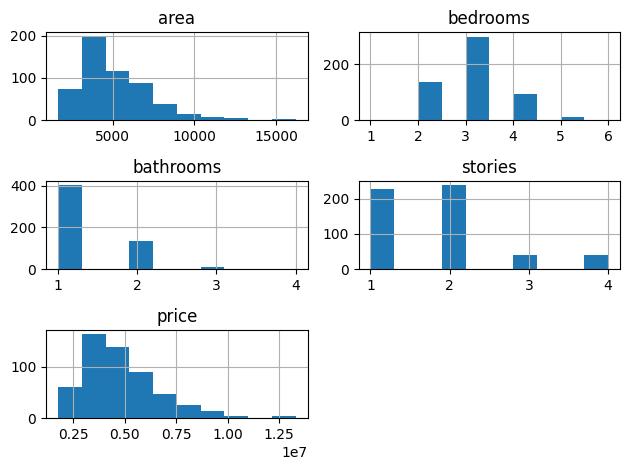

In [70]:
vis =df[['area', 'bedrooms', 'bathrooms', 'stories','price']]
vis.hist()
plt.tight_layout()
plt.show()

Now separete tha target and other feature

In [71]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories']]
Y = df[["price"]]

As we knwo that scikitlearn use numpy number for training,so we convert them in numpy

In [72]:
X_np = X.to_numpy()
Y_np = Y.to_numpy()

Now we want that model does not favour any feature so we convert it into standard form using sckitlearn 

In [73]:
from sklearn import preprocessing
X_std = preprocessing.StandardScaler()
X1_std =X_std.fit_transform(X_np)


As you can see below

In [74]:
pd.DataFrame(X1_std).describe().round(2)

,0,1,2,3
count,545.00,545.00,545.00,545.00
mean,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.61,-2.67,-0.57,-0.93
25%,-0.72,-1.31,-0.57,-0.93
50%,-0.25,0.05,-0.57,0.22
75%,0.56,0.05,1.42,0.22
max,5.10,4.12,5.41,2.53


Now spilit the data in train and test data

In [75]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test =train_test_split(X1_std,Y_np,train_size=0.8,random_state=42)

Now we split the data now we need to build multi linear regsion model

In [76]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(X_train,y_train)
coefficient = regressor.coef_
intercept = regressor.intercept_
print("Coefficient",coefficient)
print("Intercept",intercept)

Coefficient [[756705.16737715 128810.44940524 631602.37669408 419359.34417491]]
Intercept [4743105.18581257]


As we know that we cannot understand this so we need t cnvert/trainslate in real world standard

In [77]:
means = X_std.mean_
std_derivative = np.sqrt(X_std.var_)
original_coefficient = coefficient/std_derivative
original_intercept = intercept-np.sum((means * coefficient)/std_derivative)
print("Original Coefficient",original_coefficient)
print("Original Intercept",original_intercept)



Original Coefficient [[3.49009738e+02 1.74685138e+05 1.25815095e+06 4.83859660e+05]]
Original Intercept [-64342.42090567]


Now we need to predict value and then we will find its R2 score 

In [78]:
Prediction = regressor.predict(X_test)
from sklearn.metrics import r2_score
R2_score = r2_score(y_test,Prediction)
print(f"The R2 scre is:{R2_score:.2f}")


The R2 scre is:0.51


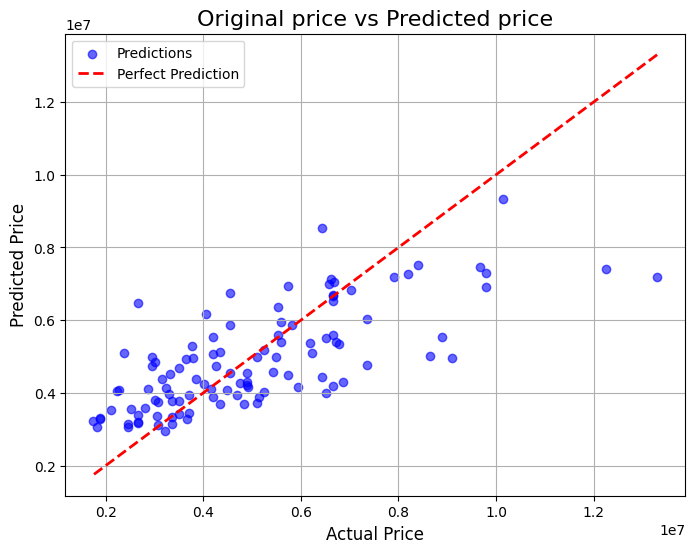

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))


plt.scatter(y_test, Prediction, alpha=0.6, color='blue', label='Predictions')

p1 = max(y_test.max(), Prediction.max())
p2 = min(y_test.min(), Prediction.min())
plt.plot([p1, p2], [p1, p2], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')



plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title('Original price vs Predicted price', fontsize=16)
plt.grid(True) 
plt.legend()   


plt.show()
